In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

# All patients here are females at least 21 years old of Pima Indian heritage.
# Pima Indians - "group of Native Americans living in an area consisting of what is now central and southern Arizona,
#                 as well as northwestern Mexico in the states of Sonora and Chihuahua" (Wikipedia)
#
#
# pregnancies = total # of pregnancies the patient has had (ALL PATIENTS ARE FEMALES)
# glucose = plasma glucose concentration a 2 hours in an oral glucose tolerance test,
#           normal blood glucose level is < 140 mg/dL 2 hours after eating
# bloodpressure = Diastolic blood pressure (mm Hg), normal blood pressure = 90/60-120/80 mmHg
# skinthickness = Triceps skin fold thickness (mm) - for women, avg = 18mm
# insulin = 2-Hour serum insulin (mu U/ml), normal level = 16-166 mIU/L (2 hrs after glucose administration)
# BMI = weight(kg)/height(m^2), avg for women = 26.5, healthy = 18.5-24.9
# diabetespedigreefunction =
# age = age
# outcome = 1 = diabetes and 0 = no diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


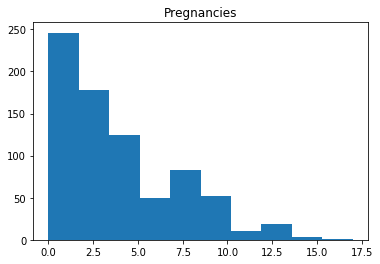

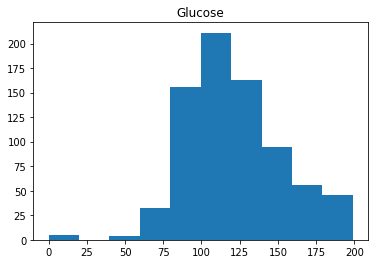

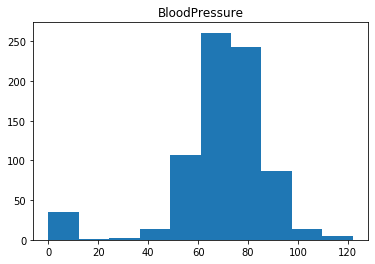

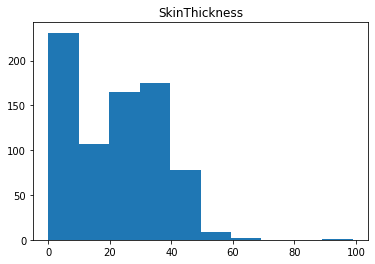

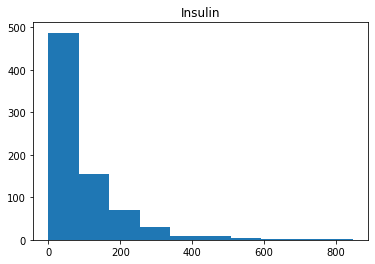

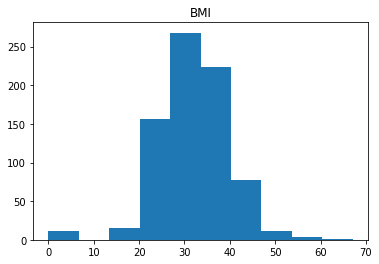

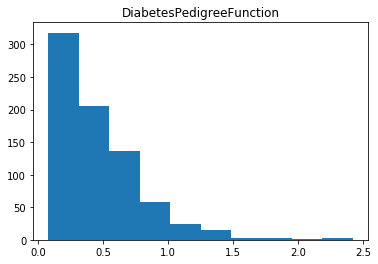

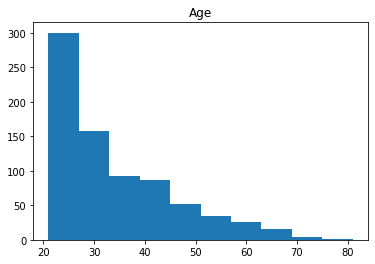

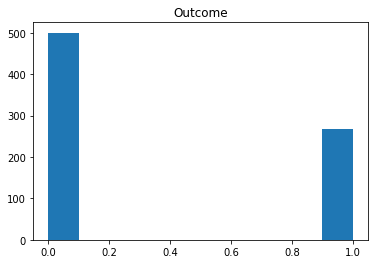

In [5]:
for i in df.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.shape

(768, 9)

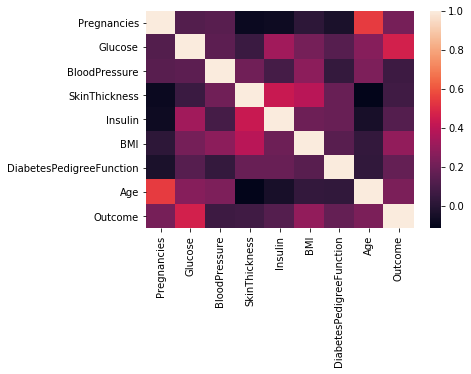

In [8]:
# heatmap of correlations
sns.heatmap(df.corr())

In [9]:
# CHECK NULL VALUES - there is no null values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

#### looking at outliers

#### low outliers

In [10]:
# glucose level of zero

print("# of people whose glucose level is zero = ",(df['Glucose']==0).sum())
df.loc[df['Glucose']==0]

# of people whose glucose level is zero =  5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [11]:
# BMI = 0 which means weight = 0

print('# of people whose BMI is zero = ',(df['BMI']==0).sum())
df.loc[df['BMI']==0]

# of people whose BMI is zero =  11


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [12]:
# blood pressure = 0

print('# of people whose blood pressure is zero = ',(df['BloodPressure']==0).sum())
df.loc[df['BloodPressure']==0]

# of people whose blood pressure is zero =  35


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


#### high outliers

In [13]:
# high skin thickness
df.loc[df['SkinThickness']>80]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [14]:
# high insulin
df.loc[df['Insulin'] >= 600]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
584,8,124,76,24,600,28.7,0.687,52,1


#### Notes

PCA before supervised stuff and compare that to running everything else

supervised - decision trees, logistic regression, random forest, boosted trees, etc - maybe stick with random forests

unsupervised - kmeans

predictors used as outputs (discussed on Tues)

missing values/weird data - EM? or throw out rows or 

First, I use random forests on the data without doing any feature engineering, just to observe the baseline performance

In [15]:
# split inputs/outputs
df_X = df.drop(['Outcome'], axis=1)
df_Y = df['Outcome']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(df_X,df_Y,test_size=0.2)

## Random Forests

### Scaling

In [17]:
clf1 = RandomForestClassifier(random_state=1)

**Comparing scaled and unscaled features performance**

In [18]:
# MinMaxScaler
X_scaled_min = pd.DataFrame(MinMaxScaler().fit_transform(df_X))
X_scaled_min.columns = df_X.columns

In [19]:
# run random forests through the data set like normal
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y,test_size=0.3)
clf1.fit(X_train, y_train)
clf1.predict(X_test)
print('normal =', accuracy_score(y_true=y_test, y_pred=clf1.predict(X_test)))

normal = 0.7619047619047619


In [20]:
# run random forests through scaled data (MinMaxScaler)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X_scaled_min,df_Y,test_size=0.3)
clf1.fit(X_train_min, y_train_min)
clf1.predict(X_test_min)
print('minmax =', accuracy_score(y_true=y_test_min, y_pred=clf1.predict(X_test_min)))

minmax = 0.7619047619047619


Scaling doesn't do much in regards to RandomForests

**Use grid search**

In [21]:
clf1 = RandomForestClassifier()
pipe = Pipeline([('std', MinMaxScaler()), ('classifier', clf1)])
grid = [{'classifier__max_features': [1, 2, 4, 6, 8],
        'classifier__n_estimators': [10, 100, 300, 1000, 2000]}]

gcv = GridSearchCV(estimator=pipe, param_grid=grid, scoring='accuracy', n_jobs=1, cv=StratifiedKFold(n_splits=5))

In [22]:
gcv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('std',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                     

Grid search results: best params, accuracy score

In [23]:
gcv.best_estimator_.fit(X_train, y_train)
test_acc = accuracy_score(y_true=y_test, y_pred=gcv.best_estimator_.predict(X_test))
test_acc

0.7662337662337663

In [24]:
gcv.best_params_

{'classifier__max_features': 2, 'classifier__n_estimators': 2000}

max_features = 8 might be due to overfitting, so I'll just stick with default value for max_features. The best hyperparameter for n_estimators is just the default value

**Dealing with missing values**

first method - remove rows where blood pressure = BMI = glucose = 0

In [25]:
df_remove = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]

In [26]:
# split into train, test sets, then train/predict
df_remove_X = df_remove.drop(['Outcome'], axis=1)
df_remove_Y = df_remove['Outcome']

accs = []
for i in range(10):
    r_X_train, r_X_test, r_Y_train, r_Y_test = train_test_split(df_remove_X, df_remove_Y, test_size=0.2)
    clf1.fit(r_X_train, r_Y_train)
    acc_score = accuracy_score(y_true=r_Y_test, y_pred=clf1.predict(r_X_test))
    accs.append(acc_score)

print('if remove rows with missing =', np.mean(accs))

if remove rows with missing = 0.7662068965517241


second method - keep rows with missing values, but insert averages of the variables

In [27]:
df_avg = df
df_avg['Glucose'].replace(0, np.mean(df['Glucose']), inplace=True)
df_avg['BloodPressure'].replace(0, np.mean(df['BloodPressure']), inplace=True)
df_avg['BMI'].replace(0, np.mean(df['BMI']), inplace=True)

In [28]:
# split into train, test sets, then train/predict
df_avg_X = df_avg.drop(['Outcome'], axis=1)
df_avg_Y = df_avg['Outcome']

accs = []
for i in range(10):
    a_X_train, a_X_test, a_Y_train, a_Y_test = train_test_split(df_avg_X, df_avg_Y, test_size=0.2)
    clf1.fit(a_X_train, a_Y_train)
    preds = clf1.predict(a_X_test)
    accs.append(accuracy_score(y_true=a_Y_test, y_pred=preds))

print('if fill rows with average =', np.mean(accs))

if fill rows with average = 0.7662337662337663


There's not much difference between dropping rows with "missing values" (i.e. values that seem unrealistic, such as BMI = 0) and filling in those rows with the average for those variables. For the remainder of the project, I will use the dataset where I fill in the average for the missing values since that seems more realistic

**Check correlation between variables after filling in missing values with averages**

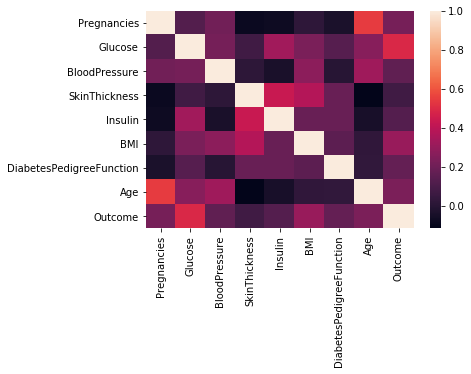

In [29]:
sns.heatmap(df_avg.corr())

Use datasets with the averages in them for the remainder of the project

In [30]:
df = df_avg
df_X = df_avg_X
df_Y = df_avg_Y

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

accs = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2)
    lr.fit(X_train, y_train)
    preds = lr.predict(X_test)
    accs.append(accuracy_score(y_test, preds))
    
print('Logistic regression =', np.mean(accs))

Logistic regression = 0.7831168831168831


## PCA

In [32]:
pca = PCA().fit(df_X)

Choosing the number of principal components to use through explained variance

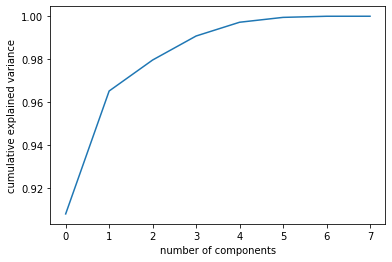

In [33]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [34]:
pca.n_components_

8

Plot the first 2 principal components of each data point

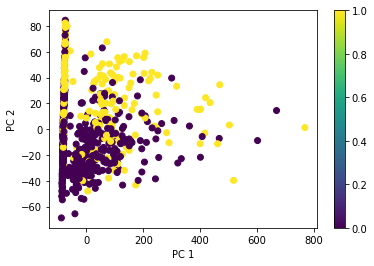

In [35]:
pca = PCA(2)
proj_2d = pca.fit_transform(df_X)
plt.scatter(proj_2d[:,0], proj_2d[:,1], c=df_Y)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()
plt.show()

**PCA then random forests**

Try different number of components before running random forests

In [36]:
# run PCA then run random forests

pca_X = PCA().fit_transform(df_X)  

accs = []
for i in range(1,9):
    cur_accs = []
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(pca_X[:,0:i], df_Y, test_size = 0.2)

        rf = RandomForestClassifier(random_state=1)
        rf.fit(X_train, y_train)
        preds = rf.predict(X_test)
        cur_accs.append(accuracy_score(preds, y_test))
    
    accs.append(np.mean(cur_accs))

print(accs)

[0.6272727272727273, 0.7240259740259741, 0.7376623376623377, 0.7233766233766235, 0.7577922077922079, 0.7311688311688311, 0.7435064935064936, 0.7487012987012986]


As long as the number of components is at least 2, the performance on random forests is the same

**Random forests without PCA**

In [37]:
accs = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.2)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    accs.append(accuracy_score(preds, y_test))
    
print('random forests without PCA =', np.mean(accs))

random forests without PCA = 0.775974025974026


Running random forests by itself has similar performance compared to PCA

**Logistic regression with PCA**

In [38]:
# run PCA then run random forests

pca_X = PCA().fit_transform(df_X)  

accs = []
for i in range(1,9):
    cur_accs = []
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(pca_X[:,0:i], df_Y, test_size = 0.2)

        lr = LogisticRegression(max_iter=1000)
        lr.fit(X_train, y_train)
        preds = lr.predict(X_test)
        cur_accs.append(accuracy_score(preds, y_test))
    
    accs.append(np.mean(cur_accs))

print(accs)

[0.6610389610389611, 0.7305194805194806, 0.7370129870129871, 0.7551948051948052, 0.7467532467532466, 0.759090909090909, 0.755844155844156, 0.7753246753246754]


## K means

In [39]:
acc = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.2)
    km = KMeans(n_clusters = 2)
    km.fit(X_train, y_train)
    km_preds = km.predict(X_test)
    acc.append(accuracy_score(y_test, km_preds))
print('K-means =', np.mean(acc))

K-means = 0.5499999999999999


**K means with PCA**

In [40]:
# run PCA then run K means

pca_X = PCA().fit_transform(df_X)

accs = []
for i in range(1,9):
    cur_accs = []
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(pca_X[:,0:i], df_Y, test_size = 0.2)

        km = KMeans(n_clusters = 2)
        km.fit(X_train, y_train)
        km_preds = km.predict(X_test)
        cur_accs.append(accuracy_score(km_preds, y_test))
    
    accs.append(np.mean(cur_accs))

print(accs)

[0.5409090909090908, 0.5155844155844156, 0.601948051948052, 0.564935064935065, 0.6740259740259741, 0.524025974025974, 0.4694805194805195, 0.5097402597402597]


We get a little better performance with k = 2 or 4

## Mixture of Gaussians

In [41]:
acc = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.2)
    gmm = GaussianMixture(n_components=2)
    gmm.fit(X_train, y_train)
    gmm_preds = gmm.predict(X_test)
    acc.append(accuracy_score(y_test, gmm_preds))
    
print('Mixture of gaussians = ',np.mean(acc))

Mixture of gaussians =  0.4675324675324675


This performs worst than K-means, so I try a grid search on the covariance_type hyperparameter

In [68]:
# set up MOG
gmm = GaussianMixture(n_components=2)
grid = [{'covariance_type': ['full', 'tied', 'diag', 'spherical']}]
gcv = GridSearchCV(estimator=gmm, param_grid=grid, scoring='accuracy', n_jobs=1, cv=StratifiedKFold(n_splits=5))

In [69]:
accs = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size = 0.2)
    gcv.fit(X_train, y_train)
    gcv.best_estimator_.fit(X_train, y_train)
    test_acc = accuracy_score(y_true=y_test, y_pred=gcv.best_estimator_.predict(X_test))
    print(gcv.best_params_)
    accs.append(test_acc)
    
print()
print('With GridSearchCV, mixture of gaussians =', np.mean(accs))

{'covariance_type': 'tied'}
{'covariance_type': 'tied'}
{'covariance_type': 'tied'}
{'covariance_type': 'spherical'}
{'covariance_type': 'full'}
{'covariance_type': 'tied'}
{'covariance_type': 'diag'}
{'covariance_type': 'spherical'}
{'covariance_type': 'tied'}
{'covariance_type': 'tied'}

With GridSearchCV, mixture of gaussians = 0.555194805194805


**Mixture of Gaussians then PCA**

In [42]:
# run PCA then run Mixture of Gaussians

pca_X = PCA().fit_transform(df_X)

accs = []
for i in range(1,9):
    cur_accs = []
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(pca_X[:,0:i], df_Y, test_size = 0.2)

        gmm = GaussianMixture(n_components = 2)
        gmm.fit(X_train, y_train)
        gmm_preds = gmm.predict(X_test)
        cur_accs.append(accuracy_score(y_test, gmm_preds))
    
    accs.append(np.mean(cur_accs))

print(accs)

[0.5025974025974026, 0.4954545454545455, 0.4785714285714285, 0.47597402597402605, 0.48311688311688306, 0.48831168831168836, 0.4818181818181818, 0.4805194805194805]
